### Import libraries:

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding, Isomap, TSNE
from sklearn.preprocessing import StandardScaler
from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

### Load data:

In [2]:
X, y = load_digits(return_X_y=True)
print(X.shape)
print(y)

(1797, 64)
[0 1 2 ... 8 9 8]


#### Display a data:

<Figure size 432x288 with 0 Axes>

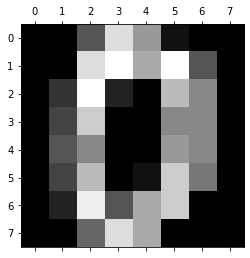

In [3]:
plt.gray() 
plt.matshow(X[0, :].reshape(8,8)) 

#### Training and testing datasets:

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(np.bincount(y_train))
print(np.bincount(y_test))

(1437, 64)
(360, 64)
[142 146 142 146 145 145 145 143 139 144]
[36 36 35 37 36 37 36 36 35 36]


### Conduct analysis:

#### Standardization:

In [5]:
sc = StandardScaler()
X_std = sc.fit_transform(X) 

In [6]:
sc_train = sc.fit(X_train)
X_train_std = sc_train.transform(X_train)
X_test_std = sc_train.transform(X_test)
print(X_train_std[0,:])
print(X_test_std[0,:])

[ 0.         -0.32791622 -0.66729715  0.74975853  0.28167039 -0.48717147
 -0.40820401 -0.12906466 -0.05649233 -0.6196993   0.30244223  1.01549952
 -0.25803504 -0.67377986 -0.51194237 -0.13587199 -0.04311807  0.10501397
  1.07682401  0.36907255 -1.13516713 -1.24574653 -0.55743478 -0.12049173
 -0.02638899  0.16026351  1.12398375  0.88354185  0.35475469 -0.44375309
 -0.63324228 -0.03733267  0.          1.59802817  1.32216782  1.10450951
  0.95570691  1.22579625 -0.82300419  0.         -0.05980442  1.15219436
  1.40523243  1.22022312 -0.28328586  1.35530501  1.28024391 -0.09081783
 -0.0333867   0.1832612   0.98823195  0.86001617  0.67051735  1.20102716
 -0.15230182 -0.21019419 -0.02638899 -0.2901044  -0.49137725 -0.02168999
  0.43907338  0.5490682  -0.50428456 -0.20282373]
[ 0.         -0.32791622  1.87229058  0.98582405  0.97356844  1.79202968
  0.18520941 -0.12906466 -0.05649233  1.5884322   1.03938074 -1.76118287
 -1.92734895 -1.33265817 -0.51194237 -0.13587199 -0.04311807  3.16202288
 

#### Manifold learning:

In [7]:
n_points = len(X_std)
n_neighbors = 30
n_components = 2

In [8]:
fig = plt.figure(figsize=(15, 15))
title = 'Manifold Learning'
title += ' with {} points,'.format(n_points)
title += ' {} neighbors'.format(n_neighbors)
plt.suptitle(title, fontsize=14)

Text(0.5, 0.98, 'Manifold Learning with 1797 points, 30 neighbors')

<Figure size 1080x1080 with 0 Axes>

PCA ...


Text(0.5, 1.0, 'PCA: 0.06 sec')

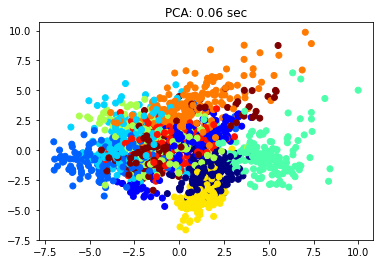

In [9]:
# PCA
print('PCA ...')
t0 = time()
Y = PCA(n_components=n_components).fit_transform(X_std)
t1 = time()
ax = fig.add_subplot(2,3,1)
plt.scatter(Y[:, 0], Y[:, 1], c=y, cmap=plt.cm.jet)
plt.title("PCA: {:.2f} sec".format(t1-t0))

Isomap ...


Text(0.5, 1.0, 'Isomap: 3.89 sec')

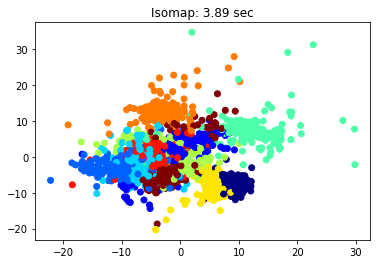

In [10]:
# Isomap
print('Isomap ...')
t0 = time()
Y = Isomap(n_neighbors=n_neighbors, n_components=n_components).fit_transform(X_std)
t1 = time()
ax = fig.add_subplot(2,3,3)
plt.scatter(Y[:, 0], Y[:, 1], c=y, cmap=plt.cm.jet)
plt.title("Isomap: {:.2f} sec".format(t1-t0))


LLE ...


Text(0.5, 1.0, 'standard LLE: 1.40 sec')

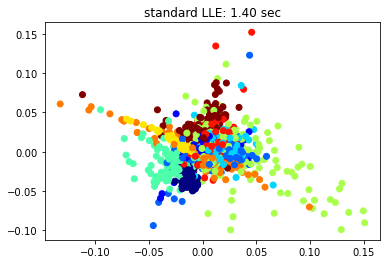

In [11]:
# LLE
print('LLE ...')
t0 = time()
Y = LocallyLinearEmbedding(n_neighbors=n_neighbors,
                           n_components=n_components,
                           eigen_solver='auto',
                           method='standard').fit_transform(X_std)
t1 = time()
ax = fig.add_subplot(2,3,4)
plt.scatter(Y[:, 0], Y[:, 1], c=y, cmap=plt.cm.jet)
plt.title("standard LLE: {:.2f} sec".format(t1-t0))

t-SNE ...


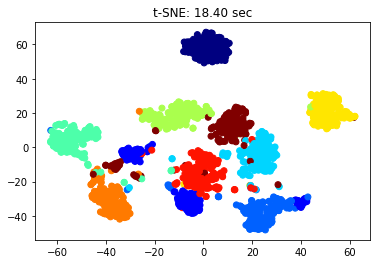

In [12]:
# t-SNE
print('t-SNE ...')
t0 = time()
Y = TSNE(n_components=n_components,
         perplexity=30, n_iter=1000,
         random_state=17).fit_transform(X_std)
t1 = time()
ax = fig.add_subplot(2,3,5)
plt.scatter(Y[:, 0], Y[:, 1], c=y, cmap=plt.cm.jet)
plt.title("t-SNE: {:.2f} sec".format(t1-t0))

plt.show()

**Looking at the plots, it is clear that t-SNE is the only manifold learning method which may classify different classes well when reducing to 2 dimensions. <br>
=> We will use t-SNE to reduce the dimensions of the data and conduct classification.**

#### Fit and transform X_train using t-SNE:

In [13]:
t_SNE = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=17)
X_SNE = t_SNE.fit_transform(X_std)
X_train_SNE, X_test_SNE, y_train, y_test = train_test_split(X_SNE, y, test_size=0.2, random_state=11, stratify=y)

#### Compare different models using train_test_split:

In [14]:
# Define a function to find best parameters using training values

def best_params(model, X_train, y_train, params):
    mod_cv = GridSearchCV(model, params, verbose=1)
    mod_cv.fit(X_train, y_train)
    return model.set_params(**mod_cv.best_params_)

In [16]:
# List of models:

neigh = best_params(KNeighborsClassifier(), X_train, y_train, {'n_neighbors': [3,5,7,9,11,13,15]})
neigh_SNE = best_params(KNeighborsClassifier(), X_train_SNE, y_train, {'n_neighbors': [3,5,7,9,11,13,15]})
dtree = best_params(DecisionTreeClassifier(), X_train, y_train, {'max_depth': [5,8,11,14,17]})
dtree_SNE = best_params(DecisionTreeClassifier(), X_train_SNE, y_train, {'max_depth': [5,8,11,14,17]})
clf = GaussianNB()
clf_SNE = clf

model_list = [neigh, neigh_SNE, dtree, dtree_SNE, clf, clf_SNE]

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [17]:
def compare_model(X_train, y_train, X_test, y_test, mod_list):
    results = {}
    for i in range(len(mod_list)):
        mod = mod_list[i]
        if i%2==0:
            X_tr = X_train[0]
            X_te = X_test[0]
        else:
            X_tr = X_train[1]
            X_te = X_test[1]
        model = mod.fit(X_tr, y_train)
        score = mod.score(X_te, y_test)
        model_name = str(model) + '_SNE' if i%2==1 else str(model) + '_no SNE'
        results[model_name] = score
    return results

In [18]:
compare_model([X_train_std, X_train_SNE], y_train, [X_test_std, X_test_SNE], y_test, model_list)

{'KNeighborsClassifier(n_neighbors=3)_no SNE': 0.9777777777777777,
 'KNeighborsClassifier()_SNE': 0.975,
 'DecisionTreeClassifier(max_depth=14)_no SNE': 0.8638888888888889,
 'DecisionTreeClassifier(max_depth=11)_SNE': 0.9694444444444444,
 'GaussianNB()_no SNE': 0.8,
 'GaussianNB()_SNE': 0.9222222222222223}

#### Compare models using KFolds (for more reliable confirmation):

In [19]:
def compare_model_K_Folds(Xh, y, mod_list):
    skf = KFold(n_splits=5, shuffle=True, random_state=7)
    results = {}
    for i in range(len(mod_list)):
        mod = mod_list[i]
        if i%2==0:
            X = Xh[0]
        else:
            X = Xh[1]
        model_name = str(mod) + '_SNE' if i%2==1 else str(mod) + '_no SNE'
        results[model_name] = []
        for train, test in skf.split(X, y):
            X_train = X[train]
            X_test = X[test]
            model = mod.fit(X_train, y[train])
            score = mod.score(X_test, y[test])
            results[model_name].append(score)
        results[model_name] = np.mean(results[model_name])
    return results

In [20]:
compare_model_K_Folds([X_std, X_SNE], y, model_list)

{'KNeighborsClassifier(n_neighbors=3)_no SNE': 0.9777437325905293,
 'KNeighborsClassifier()_SNE': 0.9677189724543485,
 'DecisionTreeClassifier(max_depth=14)_no SNE': 0.8569792633859485,
 'DecisionTreeClassifier(max_depth=11)_SNE': 0.9599257195914579,
 'GaussianNB()_no SNE': 0.7785406994738471,
 'GaussianNB()_SNE': 0.9154162797895389}

### Conclusion:

1. Models using data after dimensionality reduction using t-SNE seems to works better: <br>
a/ K-Neighbors Classifier see little difference between data before and after dimensionality reduction <br>
b/ The positive effects of using t-SNE is clearly shown in Decision Tree Classifier and Naive Bayes Gaussian <br>

2. However, t-SNE requires transformation of both training and testing data, which means there's a need to conduct dimensionality reduction on the whole set of data when new data is added.